## 라이브러리 임포트

In [1]:
#초기 설정및 시스템 라이브러리
import platform
import warnings

# 데이터 시각화 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
print(platform.system())
warnings.filterwarnings('ignore')

# 행,열,결과값 생략 없이 보기,세팅
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

# 시각화 OS별 한글폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 폰트 설정
elif platform.system() == 'Mac':
    plt.rcParams['font.family'] = 'AppleGothic'  # Mac 폰트 설정

Darwin


## 파일 불러오기

In [2]:
# Load Files
Acquisitions = pd.read_csv("./data/acquisitions.csv")
Degrees = pd.read_csv("./data/degrees.csv")
FundingRounds = pd.read_csv("./data/funding_rounds.csv")
Funds = pd.read_csv("./data/funds.csv")
Investments = pd.read_csv("./data/investments.csv")
Ipos = pd.read_csv("./data/ipos.csv")
Milestones = pd.read_csv("./data/milestones.csv")
Objects = pd.read_csv("./data/objects.csv")
Offices = pd.read_csv("./data/offices.csv")
People = pd.read_csv("./data/people.csv")
Relationships = pd.read_csv("./data/relationships.csv")

print("="*60)
print("Dataset 로드 완료!")
print("="*60)

Dataset 로드 완료!


---

## people.csv 

In [3]:
People.info()
People

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   object_id         226709 non-null  object
 2   first_name        226700 non-null  object
 3   last_name         226705 non-null  object
 4   birthplace        28084 non-null   object
 5   affiliation_name  226684 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.4+ MB


,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...,...
226704,226705,p:268589,John,Pins,NaN,Unaffiliated
226705,226706,p:268590,David,Schulhof,NaN,Unaffiliated
226706,226707,p:268592,Matthew,D. Rosen,NaN,Unaffiliated
226707,226708,p:268593,Gordon,Hutchins,NaN,Unaffiliated


In [4]:
People.isna().mean().sort_values(ascending=False).round(4)

birthplace          0.8761
affiliation_name    0.0001
first_name          0.0000
last_name           0.0000
id                  0.0000
object_id           0.0000
dtype: float64

In [5]:
People.duplicated().sum()

np.int64(0)

In [6]:
People.nunique()
People

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...,...
226704,226705,p:268589,John,Pins,NaN,Unaffiliated
226705,226706,p:268590,David,Schulhof,NaN,Unaffiliated
226706,226707,p:268592,Matthew,D. Rosen,NaN,Unaffiliated
226707,226708,p:268593,Gordon,Hutchins,NaN,Unaffiliated


In [7]:
copy_people = People.copy()
copy_people

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...,...
226704,226705,p:268589,John,Pins,NaN,Unaffiliated
226705,226706,p:268590,David,Schulhof,NaN,Unaffiliated
226706,226707,p:268592,Matthew,D. Rosen,NaN,Unaffiliated
226707,226708,p:268593,Gordon,Hutchins,NaN,Unaffiliated


### People 전처리

In [8]:
"""
copy_people(People) 전처리 함수
"""
def clean_data(copy_people):
    # 열 삭제: 'id', 'first_name', 'last_name'
    copy_people = copy_people.drop(columns=['id', 'first_name', 'last_name'])
    # 열 'object_id' 이름을 'people_p_id'(으)로 변경
    copy_people = copy_people.rename(columns={'object_id': 'people_p_id'})
    # 열에서 누락된 값을 "unknown"(으)로 대체: 'affiliation_name'
    copy_people = copy_people.fillna({'affiliation_name': "unknown"})
    return copy_people

copy_people_clean = clean_data(copy_people.copy())
copy_people_clean.head()

,people_p_id,birthplace,affiliation_name
0,p:2,NaN,Blue Nile
1,p:3,NaN,Wetpaint
2,p:4,NaN,Zoho
3,p:5,NaN,Zoho
4,p:6,"Redding, CA",i/o Ventures


### birthplace 정규화 및 카테고리 분류 함수

In [9]:
import pandas as pd
import re
import numpy as np

# --------------------------------------------------------------------
# 1) 전처리: 문자열 정리 + 소문자화 함수
# --------------------------------------------------------------------
def normalize_birthplace(bp):
    if pd.isna(bp):
        return bp  # NaN 그대로 유지

    s = str(bp).strip().lower()   # ✅ 소문자화
    s = re.sub(r"[\r\n\t]", " ", s)      # 줄바꿈/탭 제거
    s = re.sub(r"\s+", " ", s).strip()   # 다중 공백 → 단일 공백
    return s

copy_people_clean["birthplace_norm"] = copy_people_clean["birthplace"].apply(normalize_birthplace)


# --------------------------------------------------------------------
# 2) 나라별 키워드(기존 + 누락 지역 보강 + 미국 보강 자동확장)
#   - 모두 소문자로 넣어두고, substring 매칭으로 사용
# --------------------------------------------------------------------
country_alias_groups = {
    "United States": [
        "united states", "usa", "u.s.a", "u.s.", "us", "america",
        # 주/도시/지역 이름들(기존)
        "new york", "nyc", "brooklyn", "queens", "bronx", "manhattan",
        "california", "san francisco", "silicon valley", "palo alto",
        "mountain view", "los angeles", "la, ca", "santa monica", "san diego",
        "seattle", "redmond", "kirkland", "boston", "cambridge, ma",
        "chicago", "austin", "houston", "dallas", "atlanta", "pittsburgh",
        "denver", "portland, or", "miami", "orlando", "tampa", "las vegas",
        "phoenix", "minneapolis", "detroit", "ann arbor", "madison, wi",
        "princeton", "palo alto ca", "rdale, ca", "menlo park",
        "ohio", "texas", "florida", "michigan", "pennsylvania",
        "wisconsin", "iowa", "illinois", "massachusetts", "washington, dc",

        # ✅ (추가) 이번에 나온 값들
        "berkeley",
        "san jose", "san jose, ca", "san jose, california",
    ],
    "United Kingdom": [
        "united kingdom", "u.k.", "uk", "england", "scotland", "wales",
        "london", "cambridge, uk", "oxford", "belfast", "manchester",
        "surrey, england", "edinburgh", "bristol", "sheffield", "leeds",
        "newcastle upon tyne", "brighton", "nottingham",

        # ✅ (추가)
        "liverpool",
    ],
    "India": [
        "india", "new delhi", "delhi", "bombay", "mumbai",
        "bangalore", "bengaluru", "hyderabad, india", "chennai",
        "pune", "kolkata", "calcutta", "tarn taran, india",

        # ✅ (추가)
        "jaipur", "lucknow", "rajkot", "nagpur",
    ],
    "Canada": [
        "canada", "toronto", "montreal", "vancouver", "ottawa",
        "mississauga", "windsor nova scotia, canada", "calgary",
    ],
    "France": [
        "france", "paris", "tours, france", "limoges, france",
        "toulouse, france", "valence, france", "lyon", "marseille",
    ],
    "Germany": [
        "germany", "berlin", "munich", "stuttgart, germany",
        "braunschweig, germany", "koblenz, germany", "frankfurt",
        "hamburg", "cologne",
    ],
    "Israel": [
        "israel", "haifa, israel", "tel aviv", "jerusalem",
    ],
    "China": [
        "china", "beijing", "shanghai", "shenzhen", "guangzhou",
        "hong kong", "hk", "taipei, taiwan", "taiwan", "taipei",
    ],
    "taiwan": [
        "taipei, taiwan", "taiwan", "taipei",
    ],
    "hong kong": [
        "hong kong", "hk", 
    ],
    "Japan": [
        "japan", "tokyo", "kyoto, japan", "osaka", "yokohama",
        # ✅ (추가) "kyoto" 단독도 일본으로
        "kyoto",
    ],
    "Korea": [
        "korea", "south korea", "republic of korea",
        "seoul", "busan", "daegu", "incheon",
    ],
    "Australia": [
        "australia", "sydney", "melbourne", "brisbane",
        "perth", "hobart, tasmania",
    ],
    "Ireland": [
        "ireland", "dublin", "belfast, northern ireland",
    ],
    "Denmark": [
        "denmark", "copenhagen, denmark",
    ],
    "Sweden": [
        "sweden", "stockholm", "gothenburg",
    ],
    "Netherlands": [
        "netherlands", "the hague, netherlands", "amsterdam", "delft",
        # ✅ (추가)
        "rotterdam",
    ],
    "Spain": [
        "spain", "madrid", "barcelona", "valencia",
    ],
    "Brazil": [
        "brazil", "rio de janeiro", "são paulo",
    ],
    "Argentina": [
        "argentina", "buenos aires, argentina",
        # ✅ (추가) "buenos aires" 단독도 아르헨티나로
        "buenos aires",
    ],
    "Russia": [
        "russia", "moscow", "saint petersburg", "st. petersburg",
    ],
    "Turkey": [
        "turkey", "istanbul",
    ],
    "South Africa": [
        "south africa", "cape town", "johannesburg",
    ],
    "Mexico": [
        "mexico", "mexico city",
    ],
    "Singapore": [
        "singapore",
    ],
    "Switzerland": [
        "switzerland", "zurich", "geneva",
    ],
    "Finland": [
        "finland", "helsinki, finland", "espoo, finland",
    ],
    "Austria": [
        "austria", "vienna",
    ],
    "New Zealand": [
        "new zealand", "auckland", "wellington",
    ],
    "Pakistan": [
        "pakistan", "karachi", "lahore", "islamabad",
    ],
    "Bangladesh": [
        "bangladesh", "dhaka, bangladesh",
    ],
    "Italy": [
        "italy", "rome", "milan",
    ],
    "Belgium": [
        "belgium", "brussels", "ghent",
    ],
    "Norway": [
        "norway", "oslo",
    ],
    "Poland": [
        "poland", "warsaw", "krakow",
    ],
    "Portugal": [
        "portugal", "lisbon", "porto",
    ],
    "Greece": [
        "greece", "athens",
    ],
    "Chile": [
        "chile", "santiago, chile",
    ],
    "Colombia": [
        "colombia", "bogotá", "bogota",
    ],
    "Jamaica": [
        "jamaica", "kingston, jamaica",
    ],
    "Costa Rica": [
        "costa rica", "san jose, costa rica",
    ],

    # ✅ (추가) 신규 국가들
    "Hungary": [
        "hungary", "budapest", "budapest, hungary",
    ],
    "Iran": [
        "iran", "tehran", "tehran, iran", "(tehran, iran)",
    ],
    "Czech Republic": [
        "czech republic", "czechia", "prague", "prague, czech republic",
    ],
    "Ukraine": [
        "ukraine",
        "kiev", "kyiv", "kiev, ukraine", "kyiv, ukraine",
    ],
}


# --------------------------------------------------------------------
# 2-1) ✅ 미국 보강(주 전체/약어/도시 단독 표기/특수표기 자동 확장)
# --------------------------------------------------------------------
US_STATES = {
    "alabama":"al", "alaska":"ak", "arizona":"az", "arkansas":"ar", "california":"ca",
    "colorado":"co", "connecticut":"ct", "delaware":"de", "florida":"fl", "georgia":"ga",
    "hawaii":"hi", "idaho":"id", "illinois":"il", "indiana":"in", "iowa":"ia",
    "kansas":"ks", "kentucky":"ky", "louisiana":"la", "maine":"me", "maryland":"md",
    "massachusetts":"ma", "michigan":"mi", "minnesota":"mn", "mississippi":"ms", "missouri":"mo",
    "montana":"mt", "nebraska":"ne", "nevada":"nv", "new hampshire":"nh", "new jersey":"nj",
    "new mexico":"nm", "new york":"ny", "north carolina":"nc", "north dakota":"nd", "ohio":"oh",
    "oklahoma":"ok", "oregon":"or", "pennsylvania":"pa", "rhode island":"ri", "south carolina":"sc",
    "south dakota":"sd", "tennessee":"tn", "texas":"tx", "utah":"ut", "vermont":"vt",
    "virginia":"va", "washington":"wa", "west virginia":"wv", "wisconsin":"wi", "wyoming":"wy",
    "district of columbia":"dc"
}

US_CITY_ALIASES = [
    "philadelphia", "baltimore", "st. louis", "st louis", "salt lake city", "kansas city",
    "cleveland", "honolulu", "portland", "oklahoma city",
    "washington dc", "washington d.c.", "washington, d.c.", "washington d.c", "d.c.", "dc",
]

us_extra_aliases = []
for st, ab in US_STATES.items():
    us_extra_aliases.append(st)  # "virginia"
    us_extra_aliases.append(ab)  # "va"
    if len(ab) == 2:
        us_extra_aliases.append(f"{ab[0]}.{ab[1]}.")  # "v.a."

us_extra_aliases.extend(US_CITY_ALIASES)
us_extra_aliases += ["puerto rico", "u.s. virgin islands", "virgin islands", "guam"]

country_alias_groups["United States"] = sorted(
    set([a.lower() for a in country_alias_groups.get("United States", [])] + us_extra_aliases)
)


# --------------------------------------------------------------------
# 2-2) ✅ 중복 제거 + 소문자 통일 (안전)
# --------------------------------------------------------------------
for c in list(country_alias_groups.keys()):
    country_alias_groups[c] = sorted(set([str(x).lower() for x in country_alias_groups[c] if pd.notna(x)]))


# --------------------------------------------------------------------
# 2-3) alias -> country 평탄화
# --------------------------------------------------------------------
alias_to_country = {}
for country, aliases in country_alias_groups.items():
    for alias in aliases:
        alias_to_country[alias] = country  # 이미 소문자

# country 이름 자체도 마지막 토큰 매칭용
country_name_map = {c.lower(): c for c in country_alias_groups.keys()}


# --------------------------------------------------------------------
# 3) 미국 주(state) 약어 패턴
# --------------------------------------------------------------------
us_state_abbrevs = list(sorted(set(US_STATES.values()) - {"dc"})) + ["dc"]

us_state_pattern = re.compile(r",\s*(" + "|".join(us_state_abbrevs) + r")\b", re.IGNORECASE)
us_state_only_pattern = re.compile(r"^\s*(" + "|".join(us_state_abbrevs) + r")\s*$", re.IGNORECASE)


# --------------------------------------------------------------------
# 4) 실제 매핑 함수
#   ✅ 핵심: "..., japan" 같은 명시 국가는 최우선으로 먼저 잡는다 (오분류 방지)
# --------------------------------------------------------------------
def map_birthplace_to_category(bp_norm):
    if pd.isna(bp_norm):
        return np.nan

    low = bp_norm  # 이미 소문자/정규화됨

    # 4-1) ✅ 나라명이 명시돼 있으면 최우선 (예: "kyoto, japan" → Japan)
    parts = re.split(r"[,/]", low)
    parts = [p.strip() for p in parts if p.strip()]
    if parts:
        last = parts[-1]
        if last in country_name_map:
            return country_name_map[last]

    # 4-2) ✅ "ny" 같은 단독 주 약어면 바로 미국
    if us_state_only_pattern.match(low):
        return "United States"

    # 4-3) alias substring 매칭
    for alias, country in alias_to_country.items():
        if alias in low:
            return country

    # 4-4) "Redding, CA" 같은 형태면 미국
    if us_state_pattern.search(low):
        return "United States"

    # 4-5) 여기까지도 매핑 안 되면 → 원래 문자열 유지(= 미매핑)
    return bp_norm


# --------------------------------------------------------------------
# 5) cat_people_birthplace 생성/덮어쓰기
# --------------------------------------------------------------------
copy_people_clean["cat_people_birthplace"] = copy_people_clean["birthplace_norm"].apply(map_birthplace_to_category)


# --------------------------------------------------------------------
# 6) (선택) 미매핑 값 Top 확인 (원문이 그대로 남아있는 것)
# --------------------------------------------------------------------
# unmapped_top = copy_people_clean.loc[
#     copy_people_clean["cat_people_birthplace"] == copy_people_clean["birthplace_norm"],
#     "birthplace_norm"
# ].value_counts().head(50)
# print(unmapped_top)

# (선택) 특정 값이 제대로 매핑됐는지 빠른 체크
# test_vals = ["buenos aires", "jaipur", "lucknow", "san jose", "budapest",
#              "tehran", "(tehran, iran)", "liverpool", "prague", "rajkot",
#              "kiev", "nagpur", "rotterdam", "berkeley", "kyoto, japan"]
# print({v: map_birthplace_to_category(v) for v in test_vals})

In [10]:
copy_people_clean['cat_people_birthplace'].value_counts()

cat_people_birthplace
United States     19194
India              1423
United Kingdom      581
Canada              429
Australia           405
                  ...  
12/18/1989            1
brzeg                 1
6-7-1985              1
goulburn, nsw         1
e                     1
Name: count, Length: 853, dtype: int64

In [11]:
copy_people_clean['cat_people_birthplace'].unique()

array([nan, 'United States', 'Israel', 'Denmark', 'Japan', 'taiwan',
       'France', 'Germany', 'Switzerland', 'India', 'Finland',
       'Bangladesh', 'Ukraine', 'Turkey', 'Italy', 'Korea', 'Australia',
       'United Kingdom', 'the hague', 'Netherlands', 'Czech Republic',
       'Sweden', 'Canada', 'Brazil', 'South Africa', 'Iran', 'yonkers',
       'New Zealand', 'Ireland', 'c', 'Spain', 'Costa Rica', 'Jamaica',
       'Poland', 'Argentina', 'slough', 'Belgium', 'Singapore',
       'Portugal', 'bekasi', 'Austria', 'China', 'Russia', 'Norway',
       'rouen', 'tel-aviv', 'Mexico', 'zimbabwe', 'Pakistan', 'siegen',
       'huáº¿, viá»\x87t-nam', 'Chile', 'hong kong', 'urbana', 'Greece',
       'antwerp', 'uruguay', 'bonn', 'essen', 'youngstown', 'novi sad',
       'kelheim', 'bochum', 'naples', 'kelowna', 'lebanon', 'grenoble',
       'basel', 'adoni', 'eygpt', 'lodo', 'goa', 'Colombia', 'bern',
       'gloucester', 'leuven', 'benoni', 'verona', 'kent', 'brzesko',
       'skopje', 'c

In [12]:
copy_people_clean

,people_p_id,birthplace,affiliation_name,birthplace_norm,cat_people_birthplace
0,p:2,NaN,Blue Nile,NaN,NaN
1,p:3,NaN,Wetpaint,NaN,NaN
2,p:4,NaN,Zoho,NaN,NaN
3,p:5,NaN,Zoho,NaN,NaN
4,p:6,"Redding, CA",i/o Ventures,"redding, ca",United States
...,...,...,...,...,...
226704,p:268589,NaN,Unaffiliated,NaN,NaN
226705,p:268590,NaN,Unaffiliated,NaN,NaN
226706,p:268592,NaN,Unaffiliated,NaN,NaN
226707,p:268593,NaN,Unaffiliated,NaN,NaN


In [13]:
copy_people_clean['cat_people_birthplace'].value_counts()
copy_people_clean

,people_p_id,birthplace,affiliation_name,birthplace_norm,cat_people_birthplace
0,p:2,NaN,Blue Nile,NaN,NaN
1,p:3,NaN,Wetpaint,NaN,NaN
2,p:4,NaN,Zoho,NaN,NaN
3,p:5,NaN,Zoho,NaN,NaN
4,p:6,"Redding, CA",i/o Ventures,"redding, ca",United States
...,...,...,...,...,...
226704,p:268589,NaN,Unaffiliated,NaN,NaN
226705,p:268590,NaN,Unaffiliated,NaN,NaN
226706,p:268592,NaN,Unaffiliated,NaN,NaN
226707,p:268593,NaN,Unaffiliated,NaN,NaN


### People 테이블 전처리 완료! -> CSV 파일로 저장!!

In [14]:
# csv파일로 저장
copy_people_clean.to_csv("./data/clean_data/clean_people_final.csv", index=False)
print("clean_people_final.csv 파일 저장완료!!!")

clean_people_final.csv 파일 저장완료!!!


---

## milestones.csv

In [15]:
Milestones.head().T

,0,1,2,3,4
id,1,2,3,4,5
object_id,c:12,c:3138,c:59,c:314,c:314
milestone_at,2008-06-09,2008-06-17,2008-06-18,2008-06-18,2008-01-22
milestone_code,other,other,other,other,other
description,Survives iPhone 3G Stevenote,Twhirl announces support for Seesmic video playback.,"More than 4 Billion videos viewed at Google Sites, 37.9% according to comScore",Reddit goes Open Source,Adds the ability to create your own Reddits
source_url,http://www.techcrunch.com/2008/06/10/twitter-fails-to-fail-community-rejoices/,http://www.inquisitr.com/1103/seesmic-now-available-in-twhirl/,http://www.comscore.com/press/release.asp?press=2268,http://blog.reddit.com/2008/06/reddit-goes-open-source.html,http://www.techcrunch.com/2008/01/22/reddit-adds-ability-to-create-your-own-reddits/
source_description,"Twitter Fails To Fail, Community Rejoices",Seesmic Now Available In Twhirl,11 Billion Videos Viewed Online in the U.S. in April 2008,reddit goes open source,Reddit Adds Ability to Create Your Own âRedditsâ
created_at,2008-06-18 08:14:06,2008-06-18 08:46:28,2008-06-18 08:50:24,2008-06-19 04:14:00,2008-06-19 04:15:53
updated_at,2008-06-18 08:14:06,2008-06-18 08:46:28,2008-06-18 08:50:24,2008-06-19 04:14:00,2008-06-19 04:15:53


In [16]:
Milestones.isna().sum()

id                        0
object_id                 0
milestone_at              0
milestone_code            0
description               0
source_url             8055
source_description    10188
created_at                0
updated_at                0
dtype: int64

In [17]:
copy_milestones = Milestones.copy()
copy_milestones

,id,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,1,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-fails-to-fail-community-rejoices/,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,2,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video playback.,http://www.inquisitr.com/1103/seesmic-now-available-in-twhirl/,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,3,c:59,2008-06-18,other,"More than 4 Billion videos viewed at Google Sites, 37.9% according to comScore",http://www.comscore.com/press/release.asp?press=2268,11 Billion Videos Viewed Online in the U.S. in April 2008,2008-06-18 08:50:24,2008-06-18 08:50:24
3,4,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-open-source.html,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,5,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-adds-ability-to-create-your-own-reddits/,Reddit Adds Ability to Create Your Own âRedditsâ,2008-06-19 04:15:53,2008-06-19 04:15:53
...,...,...,...,...,...,...,...,...,...
39451,39452,f:15096,2013-12-12,other,Hyderabad-based tech incubator-cum-seed fund BitChemy Ventures invests $6M in 3 startups,http://techcircle.vccircle.com/2013/12/12/hyderabad-based-tech-incubator-cum-seed-fund-bitchemy-ventures-invests-6m-in-3-startups/,Hyderabad-based tech incubator-cum-seed fund BitChemy Ventures invests $6M in 3 startups,2013-12-12 12:32:27,2013-12-12 12:32:27
39452,39453,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision for linking physical and digital identity with myrentalcv partnership.,http://www.miicard.com/news/201312/miicard-builds-recent-momentum-and-vision-linking-physical-and-digital-identity#!,miiCard builds on recent momentum and vision for linking physical and digital identity with myrentalcv partnership.,2013-12-12 12:58:47,2013-12-12 13:01:22
39453,39454,f:15097,2013-12-12,other,Quadro Capital Partners and FOREX CLUB Founders launch VC Fund,http://www.pehub.com/2013/12/quadro-capital-partners-and-forex-club-founders-launch-vc-fund/?utm_source=PE+Hub&utm_medium=twitter&utm_campaign=Feed%3A+pehub%2Fblog%2Fvcdeals+%28PE+HUB+Blog+%28VC+Deals%29%29,Quadro Capital Partners and FOREX CLUB Founders launch VC Fund,2013-12-12 13:12:01,2013-12-12 13:12:01
39454,39455,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln hard cap on first close,http://www.pehub.com/2013/12/odyssey-investment-partners-set-to-hit-2-bln-hard-cap-on-first-close/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+pehub%2Fblog+%28PE+HUB+Blog%29,Odyssey Investment Partners set to hit $2 bln hard cap on first close,2013-12-12 13:15:36,2013-12-12 13:15:36


### milestones 전처리

In [18]:
"""
[copy_milestones(Milestones) 데이터 전처리 함수]
- source_url, source_description, updated_at, created_at 열 삭제
- milestone_code : 모든 값이 other로 동일하여 열 삭제
- milestone_at : 형식 변경 -> datetime
- object_id -> p_object_id 로 열 이름 변경
"""
def Clean_Milestones(copy_milestones):
    # 열 삭제: 'id', 'source_url', 'source_description' 등 총 6개의 열
    copy_milestones = copy_milestones.drop(columns=['id', 'source_url', 'source_description', 'created_at', 'updated_at', 'milestone_code'])
    # 열 유형을 datetime64[ns](으)로 변경: 'milestone_at'
    copy_milestones = copy_milestones.astype({'milestone_at': 'datetime64[ns]'})
    # 열 'object_id' 이름을 'mile_cfpr_id'(으)로 변경
    copy_milestones = copy_milestones.rename(columns={'object_id': 'mile_cfpr_id'})
    return copy_milestones

milestones_clean = Clean_Milestones(copy_milestones)
milestones_clean.head()

,mile_cfpr_id,milestone_at,description
0,c:12,2008-06-09,Survives iPhone 3G Stevenote
1,c:3138,2008-06-17,Twhirl announces support for Seesmic video playback.
2,c:59,2008-06-18,"More than 4 Billion videos viewed at Google Sites, 37.9% according to comScore"
3,c:314,2008-06-18,Reddit goes Open Source
4,c:314,2008-01-22,Adds the ability to create your own Reddits


### milestones의 description 정규화 및 카테고리화

In [19]:
import pandas as pd
import numpy as np
import re

# 0. (선택) 데이터 불러오기
# milestones_clean = pd.read_csv("clean_milestones_v1.csv")

# 1. 기존 cat_mile_description 컬럼 삭제 -----------------------------
# if "cat_mile_description" in milestones_clean.columns:
#     milestones_clean.drop(columns=["cat_mile_description"], inplace=True)

# 2. 이벤트 카테고리 정의 (문장 전체에서 이벤트 유형을 먼저 매핑) ----------
category_keywords = {
    "acquisition": [
        "acquires", "acquired", "acquisition", "acquire",
        "merges with", "merger", "buyout", "takeover",
        "has been acquired", "is acquired", "purchased", "purchase of",
    ],
    "ipo": [
        " ipo", "initial public offering", "goes public", "went public",
        "public offering", "ipo terms", "sets ipo", "files for ipo",
        "files for an ipo",
    ],
    "funding": [
        "seed financing", "seed round",
        "series a", "series b", "series c", "series d", "series e", "series f",
        "vc funding", "venture capital", "investment round",
        "angel round", "angel financing",
        "equity financing", "debt financing", "funding round", "bridge round",
        "raised", "raises", "raise ", "raising",
        "secures", "secured", "provides funding",
        "investment from", "invests in", "invests into", "invested in",
        "capital injection", "loan from", "receives loan",
        "grant from", "grants",
        "funded by", "funded through",
        "closed seed", "closed financing", "closed funding", "closed round",
        "closing of funding",
    ],
    "shutdown": [
        "shuts down", "shut down", "shutdown",
        "closing down", "closed down",
        "ceases operations", "ceased operations",
        "discontinues service", "discontinued service",
        "service ended", "goes offline", "went offline", "out of business",
    ],
    "legal": [
        "lawsuit", "class action", "sues", "sued", "sue ",
        "sue for", "settlement", "files suit",
        "files for chapter 11", "bankruptcy", "chapter 11",
        "court ruling", "legal dispute",
    ],
    "patent": [
        "patent", "patented", "patent-pending",
        "trademark", "copyright",
    ],
    "pricing": [
        "pricing", "price change", "price increase", "price cut", "price drop",
        "new pricing", "pricing model",
        "subscription fee", "subscription pricing",
        "pay for performance", "price of", "charges customers",
        "announces pricing",
    ],
    "rebrand": [
        "rebrand", "rebranded", "rebranding",
        "new name", "changes its name", "changed its name",
        "renamed", "renaming",
    ],
    "campaign": [
        "campaign", "marketing campaign", "ad campaign", "advertising campaign",
        "launches campaign", "launch of campaign",
    ],
    "launch": [
        "launches", "launch of", "launched", " launch ",
        "soft launch", "beta launch",
        "goes live", "went live", "is live",
        "went open source", "goes open source", "open source",
        "unveils", "debut", "debuts",
        "first release", "initial release", "first public release",
        "public beta", "private beta", "general availability",
        "first version", "initial version",
        "closed release", "released ", "releases ",
    ],
    "product_update": [
        "updates", "updated", " update ",
        "new version", "version ", "upgrade",
        "adds support", "adds the ability", "adds feature",
        "addition of", "feature update",
        "integration with", "integrates with", "integrate with",
        "integration to",
        "announces the addition",
        "availability of", "available on", "available for",
        "support for", "compatibility with",
        "rolled out", "rolls out", "rollout",
    ],
    "partnership": [
        "partners with", "partnership with",
        "announce partnership", "announces partnership",
        "strategic partnership", "forms partnership", "signed partnership",
        "alliance with", "strategic alliance",
        "cooperation with",
        "teams up with", "team up with",
        "joins forces with",
        "works with", "working with",
        "collaboration with", "collaborates with",
        "selected to be part of",
    ],
    "hiring": [
        "hires ", "hired ", " hire ",
        "appoints", "appointed",
        "joins ", "joined ",
        "joins the", "joined the",
        "recruits", "recruited",
        "new employee", "new hire",
        "joins company", "joins as", "joins our",
        "joined as", "joined company",
        "joined advisory board",
    ],
    "leadership_change": [
        "resigns", "resigned",
        "steps down", "stepping down",
        "leaves the company", "left the company",
        "new ceo", "new cfo", "new coo", "new cto",
        "named president and ceo",
        "named ceo", "named cfo", "named coo", "named cto",
        "promoted to", "promotion to",
        "promoted as", "promotion as",
    ],
    "award": [
        " award", " awards", "awarded",
        "prize", "prizes",
        "wins ", "winner", "winning",
        "nominated", "nominee", "finalist",
        "ranked", "honoree",
        "recognised", "recognized",
        "honored", "honoured",
        "selected as a finalist",
        "selected as one of",
        "listed in", "included in the list",
    ],
    "office_opening": [
        "opens new office", "opened new office",
        "opening of office",
        "opens office", "opened office",
        "new hq", "new headquarters",
        "moves headquarters", "moved headquarters",
        "relocates headquarters", "relocated headquarters",
        "opens its first", "opens its second location",
        "opens new location",
    ],
}

# 3. 동사(핵심 이벤트 동사) 기본형으로 통일 -------------------------------
#   동사 변형 → 기본형 매핑
verb_root_map = {
    # acquire / merge / buy / purchase
    "acquires": "acquire", "acquired": "acquire", "acquiring": "acquire",
    "acquire": "acquire", "acquisition": "acquire",
    "merges": "merge", "merged": "merge", "merging": "merge",
    "buyout": "buy", "buys": "buy", "bought": "buy", "purchase": "purchase", "purchased": "purchase",

    # fund / raise / secure
    "raises": "raise", "raised": "raise", "raising": "raise", "raise": "raise",
    "secures": "secure", "secured": "secure", "securing": "secure", "secure": "secure",
    "funds": "fund", "funded": "fund", "funding": "fund",

    # launch / release / unveil / roll out
    "launches": "launch", "launched": "launch", "launching": "launch", "launch": "launch",
    "releases": "release", "released": "release", "releasing": "release", "release": "release",
    "unveils": "unveil", "unveiled": "unveil", "unveiling": "unveil", "unveil": "unveil",
    "rolls": "rollout", "rolled": "rollout", "rollout": "rollout",

    # open
    "opens": "open", "opened": "open", "opening": "open", "open": "open",

    # partner / collaborate / integrate
    "partners": "partner", "partnered": "partner", "partnering": "partner", "partner": "partner",
    "collaborates": "collaborate", "collaborated": "collaborate", "collaborating": "collaborate",
    "collaborate": "collaborate",
    "integrates": "integrate", "integrated": "integrate", "integrating": "integrate",
    "integrate": "integrate",

    # hire / appoint / join
    "hires": "hire", "hired": "hire", "hiring": "hire", "hire": "hire",
    "appoints": "appoint", "appointed": "appoint", "appointing": "appoint", "appoint": "appoint",
    "joins": "join", "joined": "join", "joining": "join", "join": "join",

    # resign / step down / leave
    "resigns": "resign", "resigned": "resign", "resigning": "resign", "resign": "resign",
    "steps": "step_down", "stepped": "step_down",  # rough
    "leaves": "leave", "left": "leave",

    # sue / file / settle
    "sues": "sue", "sued": "sue", "suing": "sue", "sue": "sue",
    "files": "file", "filed": "file", "filing": "file", "file": "file",
    "settles": "settle", "settled": "settle", "settling": "settle", "settle": "settle",

    # shut down / close
    "shuts": "shutdown", "shut": "shutdown", "closing": "close",
    "closes": "close", "closed": "close", "close": "close",

    # win / award
    "wins": "win", "won": "win", "winning": "win", "win": "win",
    "awarded": "award", "awards": "award", "award": "award",

    # rebrand / rename
    "rebrands": "rebrand", "rebranded": "rebrand", "rebranding": "rebrand", "rebrand": "rebrand",
    "renamed": "rename", "renaming": "rename", "renames": "rename", "rename": "rename",

    # announce
    "announces": "announce", "announced": "announce", "announcing": "announce", "announce": "announce",

    # go public
    "goes": "go", "went": "go",
}

# verb_root_map 키들을 그대로 "우선 찾을 동사 후보"로 사용
verb_candidates = set(verb_root_map.keys())

# 4. stopword: 대명사/조동사/불용어 (fallback일 때 pronoun 안 뽑도록) -----
stopwords = {
    # 관사/접속사/전치사 등
    "the", "a", "an", "to", "for", "of", "in", "on", "at", "with",
    "and", "or", "but", "from", "by", "our", "their", "its",
    "as", "into", "about", "over", "than",
    # be 동사 & 조동사
    "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "do", "does", "did",
    "can", "could", "should", "would", "will", "shall",
    "may", "might", "must",
    # 대명사
    "i", "you", "he", "she", "it", "we", "they",
    "me", "him", "her", "us", "them",
    "my", "your", "his", "her", "our", "their",
    "mine", "yours", "hers", "ours", "theirs",
    "this", "that", "these", "those",
    # 회사형태/일반적인 의미없는 단어
    "new", "news", "company", "inc", "corp", "llc", "ltd", "co", "com",
    "group", "systems", "software", "technology", "tech",
    "online", "web", "based", "service", "platform", "app", "mobile",
    "startup", "firm", "business",
    "announces", "announcement",
}

# 5. 한 행에 대한 카테고리/동사 추출 함수 -------------------------------
def categorize_or_verb(text: str):
    # 결측치 → 그대로 NaN
    if pd.isna(text):
        return np.nan

    s = str(text)
    low = s.lower()

    # 5-1. 먼저 이벤트 카테고리(명사형 라벨)로 묶기
    for cat, keys in category_keywords.items():
        for kw in keys:
            if kw in low:
                return cat  # 예: "launch", "funding", "acquisition" 등

    # 5-2. 카테고리에 안 걸리면 → 문장 안에서 동사 후보 먼저 찾기
    tokens = re.findall(r"[a-z0-9']+", low)  # 알파벳/숫자 토큰
    for t in tokens:
        if t in verb_candidates:
            return verb_root_map.get(t, t)  # 기본형 동사로 통일해서 반환

    # 5-3. 동사 후보도 없으면 → stopword/대명사 제거 후 의미 있는 단어 1개
    for t in tokens:
        if t in stopwords:
            continue
        return t  # 이 경우에는 명사일 수도 있지만 최소한 대명사는 아님

    # 5-4. 정말 아무것도 못 고르면 → 원본 문장 그대로
    return s

# 6. 새 cat_mile_description 컬럼 생성 ------------------------------
milestones_clean["cat_mile_description"] = milestones_clean["description"].apply(
    categorize_or_verb
)

# 7. (선택) 샘플 확인 -----------------------------------------------
# print(milestones_clean[["clean_mile_description", "cat_mile_description"]].head(30))

# 8. (선택) 저장 ----------------------------------------------------
# milestones_clean.to_csv("clean_milestones_v1_cat_mile_description_v2.csv", index=False)


In [20]:
milestones_clean['cat_mile_description'].nunique()

6782

In [21]:
import re
import numpy as np

# 0. 전제: milestones_clean["cat_mile_description"]가 이미 생성되어 있음
#    (앞에서 만든 categorize_or_verb 적용까지 완료된 상태)

# 1. 간단한 stem 추출 함수 정의 -----------------------------------
def get_stem(word: str) -> str:
    """
    funding, funded, funds, fund → 같은 stem으로 묶기 위한 간단 스테밍 함수.
    너무 과하게 자르지 않도록 길이 조건을 같이 둠.
    """
    if not isinstance(word, str):
        return word
    
    w = word.lower().strip()
    
    # 알파벳/숫자/언더스코어만 남기기 (카테고리 라벨이 문장일 가능성 거의 없으므로)
    w = re.sub(r"[^a-z0-9_]", "", w)

    # 예외적으로 이미 'launch', 'funding', 'fund', 'acquisition' 같은
    # "의도된 카테고리 라벨"은 그대로 둘 수도 있는데,
    # 이번 요구사항은 "같은 어원은 많이 나온 쪽으로 흡수"라서
    # 일반 규칙만 적용하도록 할게.

    # 복수형 → 단수형 (ies → y)
    if len(w) > 4 and w.endswith("ies"):
        return w[:-3] + "y"

    # 과거형 / 분사형 (…ed)
    if len(w) > 4 and w.endswith("ed"):
        return w[:-2]

    # 동명사 / 현재분사 (…ing)
    if len(w) > 5 and w.endswith("ing"):
        return w[:-3]

    # 복수형 (…es)
    if len(w) > 4 and w.endswith("es"):
        return w[:-2]

    # 단순 복수형 (…s)
    if len(w) > 3 and w.endswith("s"):
        return w[:-1]

    return w

# 2. 현재 cat_mile_description 분포 확인용(선택) --------------------
# value_counts = milestones_clean["cat_mile_description"].value_counts(dropna=True)
# print(value_counts.head(30))

# 3. 각 라벨의 stem 계산 ------------------------------------------
labels = milestones_clean["cat_mile_description"].dropna().unique()
label_to_stem = {label: get_stem(label) for label in labels}

# 4. stem별로 어떤 라벨들이 묶이는지 그룹핑 ------------------------
from collections import defaultdict

stem_to_labels = defaultdict(list)
for label, stem in label_to_stem.items():
    stem_to_labels[stem].append(label)

# 5. 각 stem 그룹 안에서 "가장 자주 등장하는 라벨" 선택 ----------
value_counts = milestones_clean["cat_mile_description"].value_counts(dropna=True)

stem_to_representative = {}

for stem, lbls in stem_to_labels.items():
    if len(lbls) == 1:
        # 혼자 있는 stem은 그대로 자기 자신이 대표
        stem_to_representative[stem] = lbls[0]
    else:
        # 라벨들 중에서 빈도가 가장 높은 것을 대표로 선택
        # (요청: "분포가 많은 쪽으로 흡수")
        most_freq_label = max(lbls, key=lambda x: value_counts.get(x, 0))
        stem_to_representative[stem] = most_freq_label

# 6. label → 대표 라벨 매핑 딕셔너리 생성 -------------------------
label_to_representative = {
    label: stem_to_representative[get_stem(label)]
    for label in labels
}

# 7. 실제 cat_mile_description 값을 흡수/통합 -----------------------
def absorb_to_major_label(label):
    if pd.isna(label):
        return np.nan
    return label_to_representative.get(label, label)

milestones_clean["cat_mile_description"] = milestones_clean["cat_mile_description"].apply(absorb_to_major_label)

# 8. (선택) 결과 확인 ----------------------------------------------
print(milestones_clean["cat_mile_description"].value_counts().head(50))

# 9. (선택) 저장 ---------------------------------------------------
# milestones_clean.to_csv("clean_milestones_v1_cat_mile_description_merged.csv", index=False)


cat_mile_description
launch               5924
funding              3944
award                2441
acquisition          2424
hiring               2060
announce             1249
product_update        831
partnership           725
partner               570
release               460
founded               432
ipo                   356
open                  347
added                 257
buy                   254
founder               225
named                 201
close                 187
patent                178
leadership_change     176
campaign              143
first                 141
legal                 123
rebrand               115
win                   110
investor              109
integrate             109
started               103
article                98
sold                   97
ceo                    95
reached                85
join                   81
featured               76
go                     73
became                 73
investment             63
board            

In [22]:
milestones_clean

,mile_cfpr_id,milestone_at,description,cat_mile_description
0,c:12,2008-06-09,Survives iPhone 3G Stevenote,survives
1,c:3138,2008-06-17,Twhirl announces support for Seesmic video playback.,product_update
2,c:59,2008-06-18,"More than 4 Billion videos viewed at Google Sites, 37.9% according to comScore",more
3,c:314,2008-06-18,Reddit goes Open Source,launch
4,c:314,2008-01-22,Adds the ability to create your own Reddits,product_update
...,...,...,...,...
39451,f:15096,2013-12-12,Hyderabad-based tech incubator-cum-seed fund BitChemy Ventures invests $6M in 3 startups,hyderabad
39452,c:59519,2013-12-12,miiCard builds on recent momentum and vision for linking physical and digital identity with myrentalcv partnership.,miicard
39453,f:15097,2013-12-12,Quadro Capital Partners and FOREX CLUB Founders launch VC Fund,launch
39454,f:4101,2013-12-12,Odyssey Investment Partners set to hit $2 bln hard cap on first close,partner


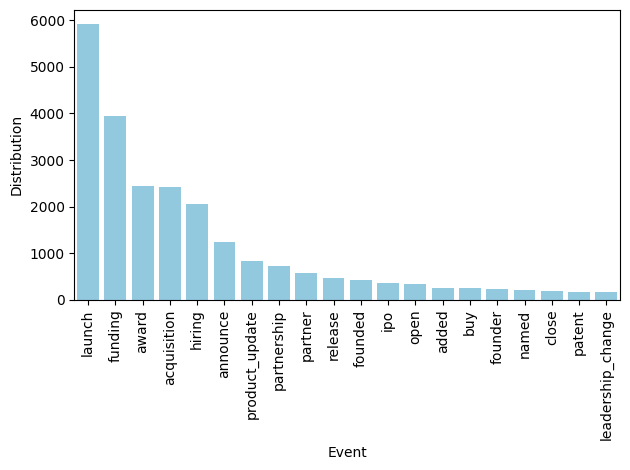

In [23]:
cnt_desc = milestones_clean['cat_mile_description'].value_counts().head(20)

sns.barplot(data=cnt_desc, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Event"); plt.ylabel("Distribution")
plt.tight_layout()
plt.show()

### Milestons 전처리 완료! CSV 파일로 저장!!!

In [24]:
milestones_clean.to_csv("data/clean_data/clean_milestones_final.csv")
print("clean_milestones_v2.csv 파일 저장완료!!")

clean_milestones_v2.csv 파일 저장완료!!


---

## Relationships.csv

In [25]:
Relationships.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [26]:
Relationships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402878 entries, 0 to 402877
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      402878 non-null  int64 
 1   relationship_id         402878 non-null  int64 
 2   person_object_id        402878 non-null  object
 3   relationship_object_id  402878 non-null  object
 4   start_at                206995 non-null  object
 5   end_at                  101046 non-null  object
 6   is_past                 402878 non-null  int64 
 7   sequence                402878 non-null  int64 
 8   title                   389526 non-null  object
 9   created_at              402878 non-null  object
 10  updated_at              402878 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.8+ MB


In [27]:
copy_relationships = Relationships.copy()
copy_relationships

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41
...,...,...,...,...,...,...,...,...,...,...,...
402873,480903,480903,p:268527,c:286218,2005-01-01,2010-01-01,1,1,Sr. Consultant/Patent Agent,2013-12-12 14:35:35,2013-12-12 14:35:35
402874,480906,480906,p:268597,c:12612,NaN,NaN,0,1,"VP, GM & Editor In Chief - Clinical Decison Support (UpToDate)",2013-12-12 14:37:56,2013-12-12 14:37:56
402875,480907,480907,p:268528,c:286152,NaN,NaN,1,273049,Vice President,2013-12-12 14:39:36,2013-12-12 14:39:36
402876,480908,480908,p:268528,c:286220,NaN,NaN,1,1,"General Counsel, Director of Patents and Licensing",2013-12-12 14:39:48,2013-12-12 14:39:48


### relationships 전처리

In [28]:
"""
copy_relationships(Relationships) 테이블 전처리 함수
"""
def clean_data(copy_relationships):
    # 열 삭제: 'id', 'created_at', 'updated_at'
    copy_relationships = copy_relationships.drop(columns=['id', 'created_at', 'updated_at'])
    # 열 유형을 datetime64[ns](으)로 변경: 'start_at', 'end_at'
    copy_relationships = copy_relationships.astype({'start_at': 'datetime64[ns]', 'end_at': 'datetime64[ns]'})
    # 열 'person_object_id' 이름을 'rel_p_id'(으)로 변경
    copy_relationships = copy_relationships.rename(columns={'person_object_id': 'rel_p_id'})
    # 열 'relationship_object_id' 이름을 're_cf_id'(으)로 변경
    copy_relationships = copy_relationships.rename(columns={'relationship_object_id': 'rel_cf_id'})
    # stat_at > end_at인 행 삭제
    copy_relationships = copy_relationships[~(copy_relationships['start_at'] > copy_relationships['end_at'])]
    # end_at 플래그 생성 -> has_end_date : 날짜 있으면 1, 결측이면 0
    copy_relationships["has_end_date"] = copy_relationships["end_at"].notna().astype(int)
    return copy_relationships

copy_relationships_clean = clean_data(copy_relationships.copy())
copy_relationships_clean.head()

,relationship_id,rel_p_id,rel_cf_id,start_at,end_at,is_past,sequence,title,has_end_date
0,1,p:2,c:1,NaT,NaT,0,8,Co-Founder/CEO/Board of Directors,0
1,2,p:3,c:1,NaT,NaT,1,279242,VP Marketing,0
2,3,p:4,c:3,NaT,NaT,0,4,Evangelist,0
3,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,1
4,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,1


### title(직책) 정규화 및 카테고리 분류 함수

In [29]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# -----------------------------
# 0) 타이틀 정규화 (한 줄에 여러 직책 방지)
#    "/" 등으로 쪼개기보단 "대표 1개만" 남기기 위한 최소 정리
# -----------------------------
def normalize_title_one(t):
    if pd.isna(t):
        return np.nan
    s = str(t).strip()

    # 흔한 구분자들: & , ; | / 등 -> "첫 번째"만 사용 (한 직책만)
    s = re.split(r"\s*(/|\||;|,|&|\+)\s*", s)[0].strip()

    # 공백 정리
    s = re.sub(r"\s+", " ", s).strip()
    return s


# -----------------------------
# 1) 룰 기반 카테고리 (우선 적용)
# -----------------------------
def rule_category(title):
    if pd.isna(title):
        return np.nan

    t_original = str(title).strip()
    t = t_original.lower()

    # Founder (최우선)
    if ('founder' in t) or ('co-founder' in t) or ('cofounder' in t) or ('founding partner' in t) or ('founding member' in t):
        return 'Founder'

    # CEO (Chief Executive 포함)
    if (
        'chief executive officer' in t or
        'chief executive' in t or
        'chief exec officer' in t or
        'chief exec' in t or
        re.search(r'\bceo\b', t)
    ):
        return 'CEO'

    # ✅ Executive Positions -> Executive
    if "executive positions" in t:
        return "Executive"

    # ✅ Owner -> CEO (owner, owner & president 등도 포함)
    if re.search(r"\bowner\b", t):
        return "CEO"
    
    # ✅ Executive(임원/경영진급) - Executive Assistant 같은 건 원하면 따로 빼도 됨
    if re.search(r"\bexecutive\b", t):
        return "Executive"

    # C-Level (CEO 제외 C*O / Chief ~ Officer)
    m = re.search(r'\bc[a-z]{1,4}o\b', t)
    if m and m.group(0) != 'ceo':
        return 'C-Level'
    if 'chief ' in t and ' officer' in t and 'chief executive officer' not in t:
        return 'C-Level'

    # 자주 쓰이는 큰 범주들
    if 'board' in t:
        return 'Board'
    if 'chairman' in t or 'chairwoman' in t or re.search(r'\bchair\b', t):
        return 'CEO'
    if 'director' in t:
        return 'Director'
    if 'president' in t:
        return 'CEO'
    if 'vice president' in t or re.search(r'\bvp\b', t) or re.search(r'\bsvp\b', t) or re.search(r'\bevp\b', t):
        return 'VP'
    if 'partner' in t:
        return 'Partner'
    if 'advisor' in t or 'adviser' in t or 'mentor' in t:
        return 'Advisor'
    if 'investor' in t or 'investment' in t or 'venture partner' in t:
        return 'Investor'
    if 'manager' in t:
        return 'Manager'
    if 'consultant' in t or 'consulting' in t:
        return 'Consultant'
    if 'engineer' in t or 'developer' in t or 'scientist' in t or 'researcher' in t:
        return 'Technical Staff'
    if 'intern' in t or 'trainee' in t:
        return 'Intern'

    # 룰로 못 잡으면 None 반환 (여기서 "원본 유지" 금지: 50개로 줄여야 하니까)
    return None


# -----------------------------
# 2) 클러스터링으로 "남은 것"을 최대 50개 안에 강제 배정
# -----------------------------
def build_cat_rel_title_max50(df, title_col='cat_rel_title', max_cats=50, random_state=42):
    out = df.copy()

    # 대표 1개 직책만 남기도록 최소 정규화
    out['_title_1'] = out[title_col].apply(normalize_title_one)

    # 1) 룰 기반 먼저 적용
    out['_rule_cat'] = out['_title_1'].apply(rule_category)

    # 현재 룰 카테고리 수
    base_cats = sorted([c for c in out['_rule_cat'].dropna().unique()])
    base_k = len(base_cats)

    # 룰 카테고리가 max를 이미 초과하면: (거의 없겠지만) 룰을 더 합쳐야 함
    if base_k > max_cats:
        raise ValueError(f"룰 카테고리가 이미 {base_k}개입니다. (max={max_cats}) 룰을 더 크게 합쳐야 합니다.")

    # 2) 룰로 분류 못한 것만 추림
    mask_unmapped = out['_rule_cat'].isna() & out['_title_1'].notna()
    unmapped_titles = out.loc[mask_unmapped, '_title_1']

    # 남은 슬롯 수만큼 클러스터 생성
    remaining_slots = max_cats - base_k

    if len(unmapped_titles) == 0:
        out['cat_rel_title'] = out['_rule_cat']
        return out.drop(columns=['_title_1', '_rule_cat'])

    # 고유 title이 remaining_slots보다 적으면, 클러스터링 대신 그대로 그룹(그래도 max 이내)
    uniq_unmapped = unmapped_titles.unique()
    if len(uniq_unmapped) <= remaining_slots:
        # 각 고유 title을 그대로 "카테고리"로 사용해도 max 50 이내
        out.loc[mask_unmapped, 'cat_rel_title'] = unmapped_titles
        out.loc[~mask_unmapped, 'cat_rel_title'] = out.loc[~mask_unmapped, '_rule_cat']
        return out.drop(columns=['_title_1', '_rule_cat'])

    # TF-IDF 벡터화
    vectorizer = TfidfVectorizer(
        lowercase=True,
        ngram_range=(1, 2),
        min_df=2  # 너무 희귀한 단어 노이즈 줄이기 (필요시 1로)
    )
    X = vectorizer.fit_transform(unmapped_titles)

    # 클러스터 수: 남은 슬롯 내에서
    n_clusters = max(2, remaining_slots)  # 남은 슬롯이 1이면 사실상 의미가 없어서 최소 2로
    if n_clusters > len(unmapped_titles):
        n_clusters = len(unmapped_titles)

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    labels = kmeans.fit_predict(X)

    # 각 클러스터의 대표 라벨 = 클러스터 내 "가장 많이 나온 원본 title"
    tmp = pd.DataFrame({
        'title': unmapped_titles.values,
        'cluster': labels
    })
    rep = (
        tmp.groupby('cluster')['title']
        .agg(lambda s: s.value_counts().index[0])
        .to_dict()
    )

    # 최종 클러스터 라벨명 만들기 (Other 없이)
    cluster_name = {c: f"Cluster_{c:02d}: {rep[c]}" for c in rep.keys()}

    out.loc[mask_unmapped, 'cat_rel_title'] = [cluster_name[c] for c in labels]
    out.loc[~mask_unmapped, 'cat_rel_title'] = out.loc[~mask_unmapped, '_rule_cat']

    # 안전 체크: 고유값 <= max_cats
    nunique = out['cat_rel_title'].nunique(dropna=True)
    if nunique > max_cats:
        print(f"[WARN] cat_rel_title unique={nunique} > {max_cats}. min_df/n_clusters 조정 필요.")

    return out.drop(columns=['_title_1', '_rule_cat'])


# -----------------------------
# 실행
# -----------------------------
copy_relationships_clean = build_cat_rel_title_max50(copy_relationships_clean, title_col='title', max_cats=50)

# Cluster_XX: 제거
copy_relationships_clean["cat_rel_title"] = (
    copy_relationships_clean["cat_rel_title"]
    .astype("string")
    .str.replace(r"^Cluster_\d+:\s*", "", regex=True)
)

copy_relationships_clean["cat_rel_title"] = copy_relationships_clean["cat_rel_title"].replace({
    "Owner": "CEO",
    "Executive Positions": "Executive"
})
# 결과 확인
print("cat_rel_title unique:", copy_relationships_clean['cat_rel_title'].nunique(dropna=True))
print(copy_relationships_clean['cat_rel_title'].value_counts().head(30))

cat_rel_title unique: 50
cat_rel_title
CEO                     68896
Founder                 62115
Sales                   39215
Director                38136
C-Level                 35491
Board                   28147
VP                      25128
Manager                 18631
Technical Staff         13668
Partner                 10956
Executive                8160
Advisor                  7084
Investor                 5557
Consultant               4977
Associate                2438
Principal                2045
Intern                   1700
Business Development     1423
Member                   1276
Product                  1272
Analyst                  1169
Research Assistant        950
MD                        783
Professor                 755
Marketing                 730
General Counsel           664
Senior Associate          601
Team Member               568
Head                      558
Leadership                547
Name: count, dtype: Int64


In [30]:
copy_relationships_clean['cat_rel_title'].unique()

<StringArray>
[                  'Founder',                        'VP',
                     'Sales',                  'Director',
                       'CEO',           'Technical Staff',
                   'Manager',                   'C-Level',
                   'Partner',                     'Board',
                 'Executive',                        <NA>,
                  'Investor',                  'Designer',
           'General Counsel',           'Chief Architect',
                   'Product',                 'Principal',
                   'Advisor',           'Editor in Chief',
                 'Marketing',      'System Administrator',
                   'Creator',          'Customer Support',
      'Business Development',                 'Architect',
                'Controller',                      'Head',
                'Consultant',     'Marketing Coordinator',
                        'MD',              'Web Designer',
               'Team Leader',             

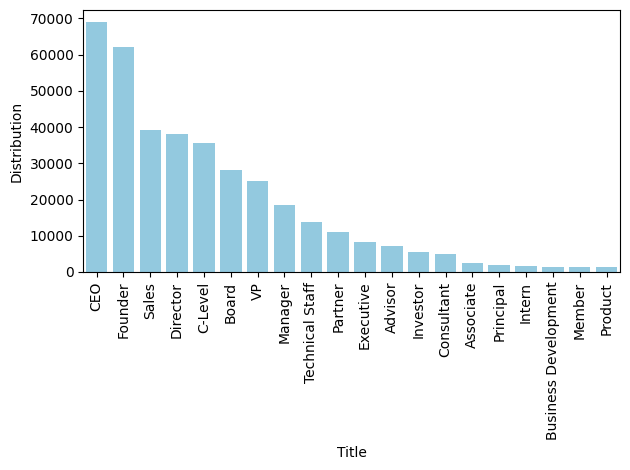

In [31]:
clean_rel = copy_relationships_clean['cat_rel_title'].value_counts().head(20)

sns.barplot(data=clean_rel, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Title"); plt.ylabel("Distribution")
plt.tight_layout()
plt.show()

### Relationships 테이블 전처리 완료 -> CSV 파일로 저장!!

In [32]:
copy_relationships_clean.to_csv("data/clean_data/clean_relationships_final.csv", index=False)
print("clean_relationships_final.csv 파일 저장완료!")

clean_relationships_final.csv 파일 저장완료!


---